# **Python Project - Oktoberfest Dataset**

Welcome to the final project of our course! During the last two weeks, you have learned a set of linear algebra tools and you have got to know the necessary Python tools to work with data. In the following two days, you are going to put everything you learned into practice using an Oktoberfest Dataset published by the city of Munich. The data goes back to 1985 with annual datapoints regarding beer price, attendance and other variables. To know more about the dataset, do not hesitate to check out this link:

https://www.opengov-muenchen.de/tr/dataset/oktoberfest/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2.

## **Project description**


Take this Jupyter Notebook as a basis and investigate the provided Oktoberfest dataset. The goals of this project are that you come in touch with basic machine learning tasks and practice Linear Algebra with real-world data. There is no wrong and right, we just want you to play with the learned concepts of the lecture.

**Tasks:**


This notebook takes you step by step through the tasks. Your project consists of several minor tasks.
1. Data Analysis
  *  Look into the data matrix A. Which dimension does A have? Which features describe the data?
  * Plot with Seaborn various data dependencies (e.g beer price vs. beer consumption) and depict the most interesting ones.
  * (Fun Question): What could be the reason for the jump in the chicken price between 1999 and 2000?
  * Factorize A with SVD.
     * Plot the diagonal S matrix. Can you estimate the rank with the singular values?
     * Perform a low-rank approximation of A
2. Learn from Data
  * Choose a variable which you want to predict  (e.g. predict the beer consumption based on all other features). Solve the least-squares problem for this variable.
  * Drop some of the features and try to predict the variable you have chosen before. What do you observe in the least-squares error? 
  * What is the test error? What is the training error? What deviations do you observe between training and test set error?
  * Compare the results obtained from solving the least-squares problem with the unnormalized dataset A with the results obtained from the normalized dataset B.


## Preparation 

In [2]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats, linalg
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
sns.set_style("darkgrid")


# Import raw data & put them into a Pandas dataframe
raw_data = '{"year":{"0":1985,"1":1986,"2":1987,"3":1988,"4":1989,"5":1990,"6":1991,"7":1992,"8":1993,"9":1994,"10":1995,"11":1996,"12":1997,"13":1998,"14":1999,"15":2000,"16":2001,"17":2002,"18":2003,"19":2004,"20":2005,"21":2006,"22":2007,"23":2008,"24":2009,"25":2010,"26":2011,"27":2012,"28":2013,"29":2014,"30":2015,"31":2016,"32":2017,"33":2018},"duration":{"0":16,"1":16,"2":16,"3":16,"4":16,"5":16,"6":16,"7":16,"8":16,"9":16,"10":16,"11":16,"12":16,"13":16,"14":16,"15":18,"16":16,"17":16,"18":16,"19":16,"20":17,"21":18,"22":16,"23":16,"24":16,"25":17,"26":17,"27":16,"28":16,"29":16,"30":16,"31":17,"32":18,"33":16},"visitors_total":{"0":7.1,"1":6.7,"2":6.5,"3":5.7,"4":6.2,"5":6.7,"6":6.4,"7":5.9,"8":6.5,"9":6.6,"10":6.7,"11":6.9,"12":6.4,"13":6.5,"14":6.5,"15":6.9,"16":5.5,"17":5.9,"18":6.3,"19":5.9,"20":6.1,"21":6.5,"22":6.2,"23":6.0,"24":5.7,"25":6.4,"26":6.9,"27":6.4,"28":6.4,"29":6.3,"30":5.9,"31":5.6,"32":6.2,"33":6.3},"visitors_day":{"0":444,"1":419,"2":406,"3":356,"4":388,"5":419,"6":400,"7":369,"8":406,"9":413,"10":419,"11":431,"12":400,"13":406,"14":406,"15":383,"16":344,"17":369,"18":394,"19":369,"20":359,"21":361,"22":388,"23":375,"24":356,"25":376,"26":406,"27":400,"28":400,"29":394,"30":369,"31":329,"32":344,"33":394},"beer_price":{"0":3.2,"1":3.3,"2":3.37,"3":3.45,"4":3.6,"5":3.77,"6":4.21,"7":4.42,"8":4.71,"9":4.89,"10":5.15,"11":5.24,"12":5.45,"13":5.6,"14":5.8,"15":6.35,"16":6.47,"17":6.75,"18":6.75,"19":7.02,"20":7.15,"21":7.42,"22":7.85,"23":8.25,"24":8.53,"25":8.79,"26":9.09,"27":9.41,"28":9.78,"29":9.98,"30":10.27,"31":10.57,"32":10.87,"33":11.3},"beer_consumption":{"0":54541,"1":53807,"2":51842,"3":50951,"4":51241,"5":54300,"6":54686,"7":48888,"8":51933,"9":52108,"10":50162,"11":52622,"12":55891,"13":54782,"14":60054,"15":64591,"16":48698,"17":57614,"18":62294,"19":61163,"20":61772,"21":68617,"22":69406,"23":64922,"24":66436,"25":71000,"26":79225,"27":74025,"28":77031,"29":76808,"30":75134,"31":66231,"32":77836,"33":78705},"chicken_price":{"0":4.77,"1":3.92,"2":3.98,"3":4.19,"4":4.22,"5":4.47,"6":4.81,"7":5.11,"8":5.25,"9":5.39,"10":5.54,"11":5.45,"12":5.38,"13":5.34,"14":5.38,"15":7.85,"16":8.12,"17":8.1,"18":8.14,"19":8.28,"20":8.35,"21":8.5,"22":8.87,"23":9.06,"24":9.18,"25":9.6,"26":9.83,"27":10.07,"28":11.1,"29":10.49,"30":10.75,"31":11.0,"32":11.41,"33":11.67},"chicken_consumption":{"0":629520,"1":698137,"2":732859,"3":720139,"4":775674,"5":750947,"6":807710,"7":725612,"8":733517,"9":663135,"10":628890,"11":595580,"12":699562,"13":603746,"14":609661,"15":681242,"16":351705,"17":459259,"18":487487,"19":481649,"20":479610,"21":494135,"22":521872,"23":459356,"24":488137,"25":505901,"26":522821,"27":508958,"28":482361,"29":509420,"30":503510,"31":366876,"32":466747,"33":436492}}'
df = pd.read_json(raw_data)

# Translate column names into English using the pandas in-built method pandas.DataFrame.rename
df.rename(columns={'jahr':'year',
                   'dauer':'duration',
                   'besucher_gesamt':'visitors_total',
                   'besucher_tag': 'visitors_day',
                   'bier_preis': 'beer_price',
                   'bier_konsum': 'beer_consumption',
                   'hendl_preis': 'chicken_price',
                   'hendl_konsum': 'chicken_consumption'
                  }, 
                 inplace=True)
print(df)

    year  duration  visitors_total  visitors_day  beer_price  \
0   1985        16             7.1           444        3.20   
1   1986        16             6.7           419        3.30   
2   1987        16             6.5           406        3.37   
3   1988        16             5.7           356        3.45   
4   1989        16             6.2           388        3.60   
5   1990        16             6.7           419        3.77   
6   1991        16             6.4           400        4.21   
7   1992        16             5.9           369        4.42   
8   1993        16             6.5           406        4.71   
9   1994        16             6.6           413        4.89   
10  1995        16             6.7           419        5.15   
11  1996        16             6.9           431        5.24   
12  1997        16             6.4           400        5.45   
13  1998        16             6.5           406        5.60   
14  1999        16             6.5      

## **1. Data Analysis**


To get a first glance on our dataset, we first have a look at the first 5 entries of the raw dataset.

In [3]:
# Display first 5 rows of the dataset 
df.head()

,year,duration,visitors_total,visitors_day,beer_price,beer_consumption,chicken_price,chicken_consumption
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


And then we look at the 5 last entries of the raw dataset.

In [4]:
df.tail()

,year,duration,visitors_total,visitors_day,beer_price,beer_consumption,chicken_price,chicken_consumption
29,2014,16,6.3,394,9.98,76808,10.49,509420
30,2015,16,5.9,369,10.27,75134,10.75,503510
31,2016,17,5.6,329,10.57,66231,11.00,366876
32,2017,18,6.2,344,10.87,77836,11.41,466747
33,2018,16,6.3,394,11.30,78705,11.67,436492


Let's get more information on the type of data every column contains. Inappropriate data types and missing values are the most common problems of datasets. We can easily analyze both using the pandas.DataFrame.info method. This method prints information about a DataFrame including column types, number of non-null values and memory usage.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 8 columns):
year                   34 non-null int64
duration               34 non-null int64
visitors_total         34 non-null float64
visitors_day           34 non-null int64
beer_price             34 non-null float64
beer_consumption       34 non-null int64
chicken_price          34 non-null float64
chicken_consumption    34 non-null int64
dtypes: float64(3), int64(5)
memory usage: 2.4 KB


### **Question 1a**

Look into the data matrix A. Which dimension does A have? Which features describe the data? Does the dataset contain null values?

In [93]:
# ...
A = df.to_numpy()
print("\nThe data matrix A:")
print(A)
print("\nThe shape of data matrix A:")
print(A.shape)
print("\nThe columns or features that describe the data: \n")
print(df.columns)
#if df.eq(0).any(1) == True:
#    print("there exits null data")
print("\nIn these locations of A there are null values:")
#print(np.argwhere(A==0))
print(df.isnull().sum())


The data matrix A:
[[1.98500e+03 1.60000e+01 7.10000e+00 4.44000e+02 3.20000e+00 5.45410e+04
  4.77000e+00 6.29520e+05]
 [1.98600e+03 1.60000e+01 6.70000e+00 4.19000e+02 3.30000e+00 5.38070e+04
  3.92000e+00 6.98137e+05]
 [1.98700e+03 1.60000e+01 6.50000e+00 4.06000e+02 3.37000e+00 5.18420e+04
  3.98000e+00 7.32859e+05]
 [1.98800e+03 1.60000e+01 5.70000e+00 3.56000e+02 3.45000e+00 5.09510e+04
  4.19000e+00 7.20139e+05]
 [1.98900e+03 1.60000e+01 6.20000e+00 3.88000e+02 3.60000e+00 5.12410e+04
  4.22000e+00 7.75674e+05]
 [1.99000e+03 1.60000e+01 6.70000e+00 4.19000e+02 3.77000e+00 5.43000e+04
  4.47000e+00 7.50947e+05]
 [1.99100e+03 1.60000e+01 6.40000e+00 4.00000e+02 4.21000e+00 5.46860e+04
  4.81000e+00 8.07710e+05]
 [1.99200e+03 1.60000e+01 5.90000e+00 3.69000e+02 4.42000e+00 4.88880e+04
  5.11000e+00 7.25612e+05]
 [1.99300e+03 1.60000e+01 6.50000e+00 4.06000e+02 4.71000e+00 5.19330e+04
  5.25000e+00 7.33517e+05]
 [1.99400e+03 1.60000e+01 6.60000e+00 4.13000e+02 4.89000e+00 5.21080e+

Let's start playing with the data!

We start taking a closer look at the variable `visitors_day`. To get information about the distribution of a variable, we can do a histogram. In this particular case, we include a plot of a kernel density estimation (KDE) as a smooth representation. The black curve is a normal distribution fitted to the data.

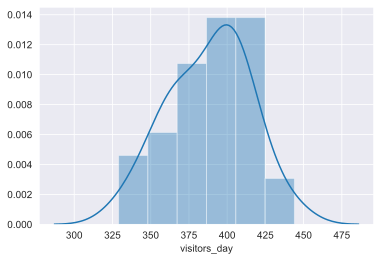

In [37]:
sns.distplot(df.visitors_day)
plt.show()

### **Question 1b**


Plot with Seaborn various data dependencies (e.g beer price vs. beer consumption) and depict the most interesting ones.


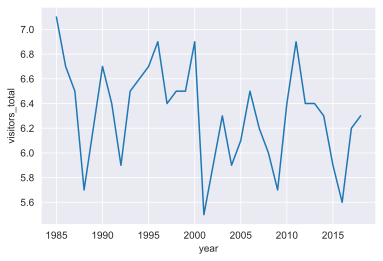

number of visitors is random with years, very low count on 1988,2001,2009 and 2016


In [45]:
# What does the following plot show? What interesting effects can you observe?

sns.lineplot(x='year', y='visitors_total', data=df)
plt.show()
print("number of visitors is random with years, very low count on 1988,2001,2009 and 2016")

Now it's your turn to continue playing around with the provided dataset. What is the relationship between `beer_price` and `beer_consumption`? Is the relationship between `chicken_price` and `chicken_consumption` similar? Try to discover other interesting findings. What relationship would you never have expected? What variables are highly correlated? These are only example questions, take your time and develop interesting visualizations and describe your results. This is your project, so the sky is the limit! Using Seaborn, plot various data dependencies (e.g beer price vs. beer consumption) and depict the most interesting ones.


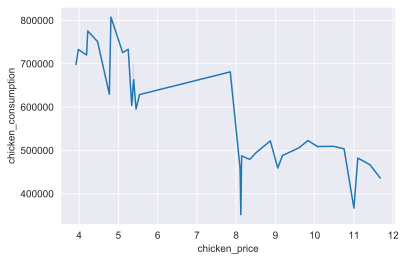

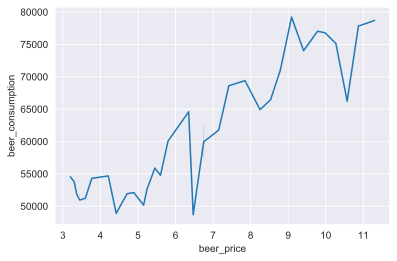

In [44]:
# Plot with Seaborn various data dependencies

# ....

sns.lineplot(x='chicken_price', y='chicken_consumption', data=df)
plt.show()
sns.lineplot(x='beer_price', y='beer_consumption', data=df)
plt.show()


The grids with colour near to white or values near to 1 has high correlations with respective features


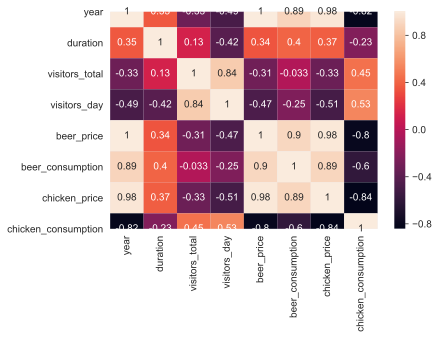

In [50]:
# What plots do you find most interesting?

# ....
sns.heatmap(df.corr(), annot= True)
print("The grids with colour near to white or values near to 1 has high correlations with respective features")

Use Seaborn's PairGrid to plot the development of all 8 variables throughout the years in separate plots. Do not forget to label the axes.

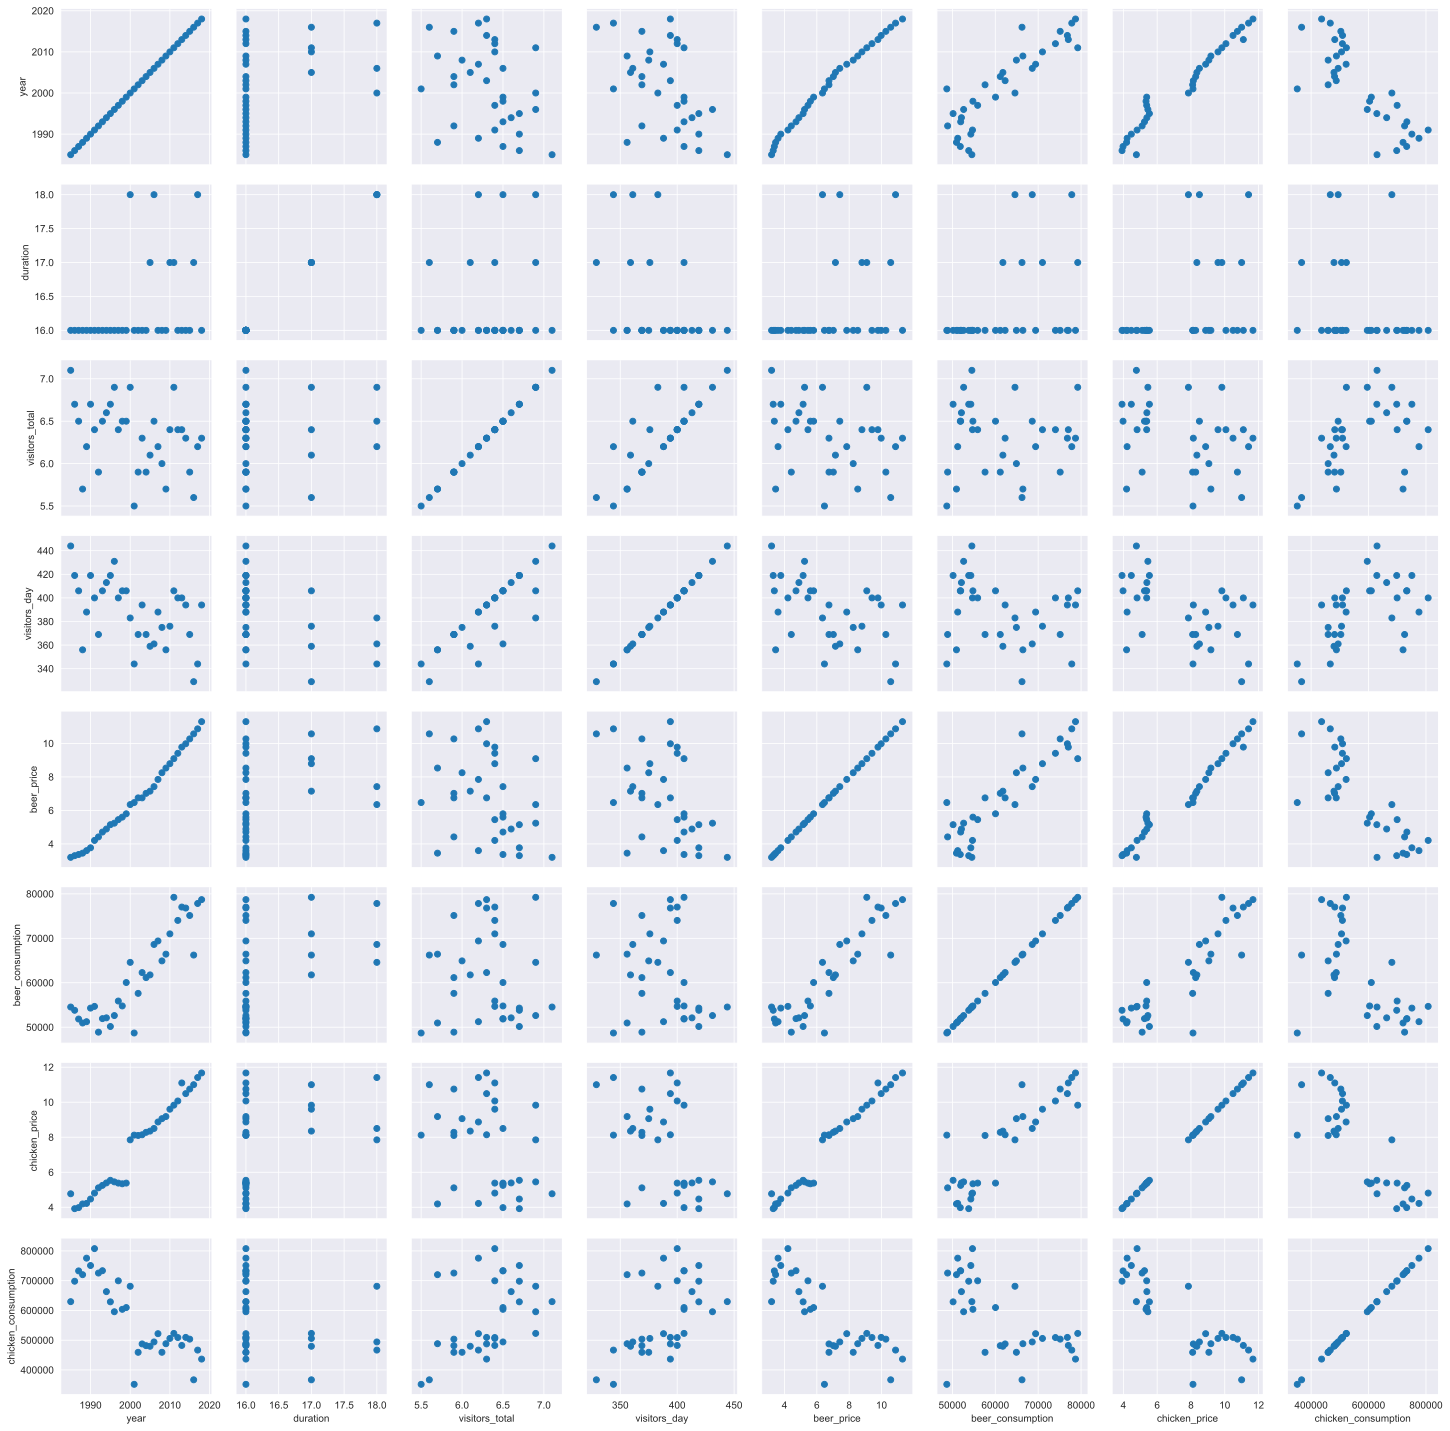

In [201]:
# ....
g = sns.PairGrid(df)
g.map(plt.scatter) # for all plots

### **Question 1c (Fun Question)**

Let's have a look at the beer and chicken consumption. Use `jointplot` to plot the relationship between these two variables. What could be the reason for the jump in the chicken price between 1999 and 2000?

except one outlier usual trend is that the chicken consumption reduces with higher beer consumption
most beer consumtion values and chicken consumption values are centered around 50000 in histogram


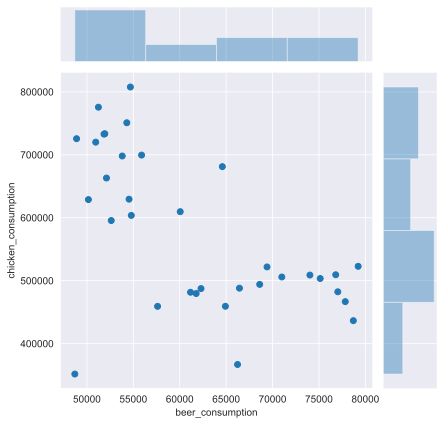

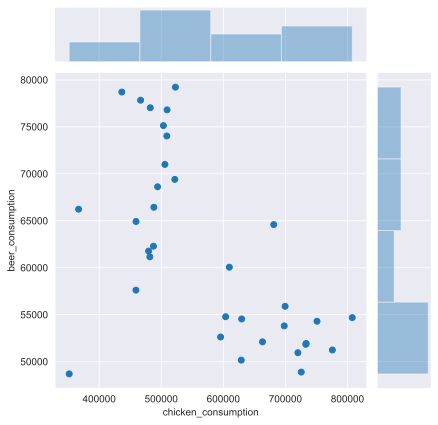

In [53]:
# ...
sns.jointplot(x='beer_consumption',y='chicken_consumption',data=df)
sns.jointplot(x='chicken_consumption',y='beer_consumption',data=df)
print("except one outlier usual trend is that the chicken consumption reduces with higher beer consumption")
print("most beer consumtion values and chicken consumption values are centered around 50000 in histogram")

around 2000 chicken consumption was way less as well as price increased


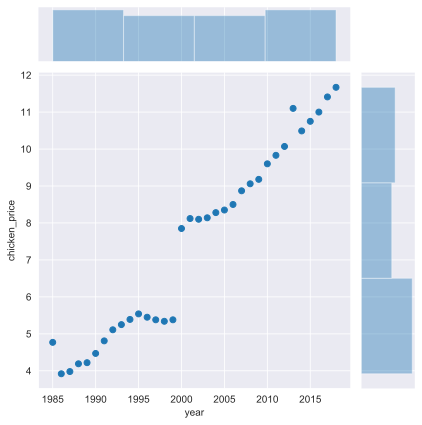

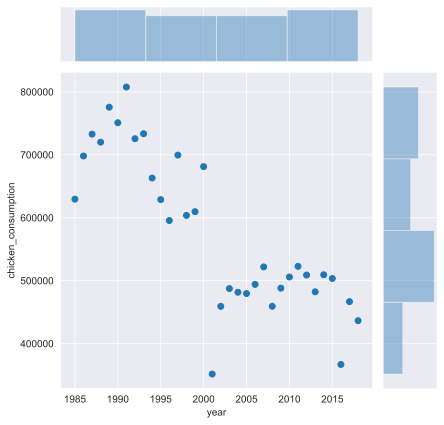

In [59]:
sns.jointplot(x='year',y='chicken_price',data=df)
sns.jointplot(x='year',y='chicken_consumption',data=df)
print("around 2000 chicken consumption was way less as well as price increased")

### **Question 1d**

Factorize A using the Singular Value Decomposition. To use the scipy method `svd`, we must convert the pandas dataframe to numpy using the `pandas.dataframe.to_numpy()` method.



In [98]:
A = df.to_numpy()  # convert the pandas dataframe to a Numpy array
print(A.shape)
print(type(A))

# ...
u1, s1, vh1 = np.linalg.svd(A, full_matrices=False,compute_uv=True)    

print("dim(X) = ", A.shape)
print("dim(U) = ", u1.shape) 
print("dim(S) = ", s1.shape)
print("dim(V) = ", vh1.shape)




(34, 8)
<class 'numpy.ndarray'>
dim(X) =  (34, 8)
dim(U) =  (34, 8)
dim(S) =  (8,)
dim(V) =  (8, 8)


**Plot the diagonal S matrix**

Can you estimate the rank with the singular values?


[3.44935398e+06 1.16767822e+05 9.38067008e+02 1.28748529e+02
 4.53587555e+00 3.00647256e+00 1.76701155e+00 7.07054483e-02]


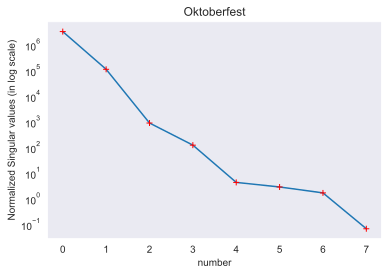

we can say that the rank is 8 though the last sigma is near to 0, order of 10^-2. So if low rank approximation is taken rank 7 can also be taken


In [203]:
# ...
plt.figure()
plt.grid()
print(s1)
#plt.plot(s1[0:8]/s1[0])
#plt.plot(s1[0:8]/s1[0],'r+')
#plt.plot(s1[0:8])
#plt.plot(s1[0:8],'r+')
plt.semilogy(s1[0:8])
plt.semilogy(s1[0:8],'r+')

plt.xlabel('number')
plt.ylabel('Normalized Singular values (in log scale)')
plt.title('Oktoberfest')

plt.show()

print("we can say that the rank is 8 though the last sigma is near to 0, order of 10^-2. So if low rank approximation is taken rank 7 can also be taken")

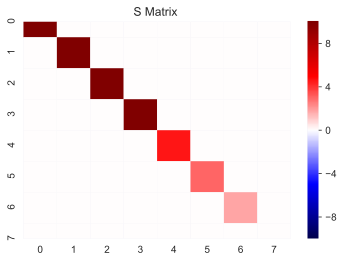

In [101]:
sns.heatmap(np.diag(s1), vmin=-10, vmax=10, cmap='seismic')
plt.title("S Matrix ")
plt.show()


**Perform a low-rank approximation of A.**

In [96]:
# ...
f = 5
X_hat = u1[:,0:f] @ np.diag(s1[0:f]) @ vh1[0:f,:]
print(X_hat.shape)
print(X_hat)
# # Show Approximation
# plt.figure()
# plt.imshow(X_hat,cmap='gray')
# plt.title("Approximate Image")

# #Show Error Image
# plt.figure()
# plt.title('Error Image')
E_1 = X_hat-A
print("Norm of the error ||A - A_hat||")
print(linalg.norm(E_1))
print(E_1.shape)
print(E_1.round())

# plt.imshow(E_1,cmap='gray')
# print("Error Norm =", np.linalg.norm(E_1,2))
print("there exists some errors as +1 and -1, we can play with low ranks, here for 5. for lower rank some errors are pretty high.")

(34, 8)
[[1.98500144e+03 1.59383932e+01 7.10104855e+00 4.43997076e+02
  3.47269342e+00 5.45410000e+04 4.35977607e+00 6.29520000e+05]
 [1.98599684e+03 1.62676578e+01 6.81493955e+00 4.19003968e+02
  3.29740096e+00 5.38070000e+04 4.11262072e+00 6.98137000e+05]
 [1.98699771e+03 1.62026242e+01 6.57782775e+00 4.06002865e+02
  3.40264356e+00 5.18420000e+04 4.07654929e+00 7.32859000e+05]
 [1.98799087e+03 1.68249104e+01 6.00126613e+00 3.56011424e+02
  3.64227033e+00 5.09509999e+04 4.49858239e+00 7.20139000e+05]
 [1.98899731e+03 1.62560876e+01 6.30379370e+00 3.88003087e+02
  3.71610981e+00 5.12410000e+04 4.24090946e+00 7.75674000e+05]
 [1.98999975e+03 1.60406064e+01 6.72385894e+00 4.18999984e+02
  3.85605088e+00 5.43000000e+04 4.38248078e+00 7.50947000e+05]
 [1.99099928e+03 1.60950446e+01 6.43941906e+00 4.00000472e+02
  4.35610864e+00 5.46860000e+04 4.67718786e+00 8.07710000e+05]
 [1.99199965e+03 1.60550684e+01 5.91985896e+00 3.69000163e+02
  4.52613439e+00 4.88880000e+04 5.00305731e+00 7.256120

## **2. Learn from Data**

In this section, we are going to predict a variable of your choice using Linear Regression.


One example would be to predict the beer consumption based on all other features.
Therefore, we create a data matrix A which holds all information except the beer price.
The beer price is the variable we want to predict and denote it as the vector $b$.

In [190]:
# drop the beer price column from the dataframe
df_without_beer_price = df.copy()  # copy the dataframe and then change it.
df_without_beer_price.drop(['beer_price'], axis=1, inplace=True)  

# create our numpy arrays A and b
A = df_without_beer_price.to_numpy()
b = df.beer_price.to_numpy()

print(A.shape)
print(b.shape)

# Check our new data
df_without_beer_price.head()  # no beer price should be found in the columms!
#df_without_beer_price.tail() 
#print(df.beer_price.head())

(34, 7)
(34,)


,year,duration,visitors_total,visitors_day,beer_consumption,chicken_price,chicken_consumption
0,1985,16,7.1,444,54541,4.77,629520
1,1986,16,6.7,419,53807,3.92,698137
2,1987,16,6.5,406,51842,3.98,732859
3,1988,16,5.7,356,50951,4.19,720139
4,1989,16,6.2,388,51241,4.22,775674


**Splitting the data into train and test set**

We first have to split the data into training and test set. Use around 70% of the samples for the training set and 30% for the test set. Additionally, choose a variable which you want to predict and split the matrix into $A$ and $b$. Thus, you should have 2 matrices ($A_{train}$, $A_{test}$) and 2 vectors ($b_{train}$, $b_{test}$).

In [191]:
# Take 70% of dataset and split it there
index_split = int(len(A) * 0.7)  # an index must be an integer number!

A_train = A[:index_split]
A_test = A[index_split:]

b_train = b[:index_split]
b_test = b[index_split:]

# print the shapes
print(A_train.shape)
print(A_test.shape)
print(b_train.shape)
print(b_test.shape)

(23, 7)
(11, 7)
(23,)
(11,)


**Solve Least Squares**

Solve the Least Squares problem $A_{train} \hat x = b_{train}$ using the training set. What train error do you obtain?

In [192]:
# ...
x_hat = np.linalg.lstsq(A_train, b_train, rcond=None)[0]

print("The elements of x: ")
print(x_hat)


The elements of x: 
[ 8.64232142e-02 -1.05994613e+01  2.79577696e+01 -4.49022076e-01
  3.67084997e-05  3.52339822e-01 -1.67085217e-06]


Now let's look at the test set. Use the learned parameters to make predictions. 

$b_{pred} = A_{test} \hat x $

What is the test error $b_{pred} - b_{test}$? What is the training error? What deviations do you observe between training and test set error? 

In [194]:
# ...
bpred = A_test@x_hat
print("predicted b values are :", bpred)
print("The error e is:")
testerror = b_test-bpred
print(testerror, ",\n")
print("Average testing error ||b_test-bpred||/number of test examples")
print(linalg.norm(testerror)/len(b_test))

bpredtrain = A_train@x_hat
print("predicted b values for training are :", bpredtrain)
print("The error e is:")
trainerror = b_train-bpredtrain
print(trainerror, ",\n")

print("Average training error ||b_train-bpredtrain||/number of train examples")
print(linalg.norm(trainerror)/len(b_train))

print("Train error is smaller than Test error") if linalg.norm(testerror)/len(b_test) > linalg.norm(trainerror)/len(b_train) else print("Test error is smaller than Train error")

predicted b values are : [ 8.11764429  8.39792471  8.76072314  9.71006364  9.02803619  9.63215482
  9.34860866  9.51750898  8.56758743  8.49747176 10.30155043]
The error e is:
[ 0.13235571  0.13207529  0.02927686 -0.62006364  0.38196381  0.14784518
  0.63139134  0.75249102  2.00241257  2.37252824  0.99844957] ,

Average testing error ||b_test-bpred||/number of test examples
0.3173807861606979
predicted b values for training are : [3.72400606 3.41179157 3.6349407  3.86878934 3.49381582 3.88113091
 4.15076512 4.20802756 4.60319261 4.51558774 4.74229003 5.14625067
 5.09507117 5.38842994 5.67259087 6.98793161 6.70659211 6.89111063
 7.07381435 7.22024631 6.83940903 6.89128616 7.77868937]
The error e is:
[-0.52400606 -0.11179157 -0.2649407  -0.41878934  0.10618418 -0.11113091
  0.05923488  0.21197244  0.10680739  0.37441226  0.40770997  0.09374933
  0.35492883  0.21157006  0.12740913 -0.63793161 -0.23659211 -0.14111063
 -0.32381435 -0.20024631  0.31059097  0.52871384  0.07131063] ,

Average 

### **Question 2a**


Now, choose a variable which you want to predict  (e.g. predict the beer consumption based on all other features). Solve the least-squares problem for this variable.

In [198]:
# ...
# drop the beer price column from the dataframe
df_without_beer_consumption = df.copy()  # copy the dataframe and then change it.
df_without_beer_consumption.drop(['beer_consumption'], axis=1, inplace=True)  

# create our numpy arrays A and b
A = df_without_beer_consumption.to_numpy()
b = df.beer_consumption.to_numpy()

print(A.shape)
print(b.shape)

# Check our new data
print(df_without_beer_consumption.head())  # no beer price should be found in the columms!

# Take 70% of dataset and split it there
index_split = int(len(A) * 0.7)  # an index must be an integer number!

A_train = A[:index_split]
A_test = A[index_split:]

b_train = b[:index_split]
b_test = b[index_split:]

# print the shapes
print(A_train.shape)
print(A_test.shape)
print(b_train.shape)
print(b_test.shape)

x_hat = np.linalg.lstsq(A_train, b_train, rcond=None)[0]

print("The elements of x: ")
print(x_hat)

bpred = A_test@x_hat
print("predicted b values are :", bpred)
print("The error e is:")
testerror = b_test-bpred
print(testerror, ",\n")
print("Average testing error ||b_test-bpred||/number of test examples")
print(linalg.norm(testerror)/len(b_test))
bpredtrain = A_train@x_hat
print("predicted b values for training are :", bpredtrain)
print("The error e is:")
trainerror = b_train-bpredtrain
print(trainerror, ",\n")

print("Average training error ||b_train-bpredtrain||/number of train examples")
print(linalg.norm(trainerror)/len(b_train))

print("Train error is smaller than Test error") if linalg.norm(testerror)/len(b_test) > linalg.norm(trainerror)/len(b_train) else print("Test error is smaller than Train error")

(34, 7)
(34,)
   year  duration  visitors_total  visitors_day  beer_price  chicken_price  \
0  1985        16             7.1           444        3.20           4.77   
1  1986        16             6.7           419        3.30           3.92   
2  1987        16             6.5           406        3.37           3.98   
3  1988        16             5.7           356        3.45           4.19   
4  1989        16             6.2           388        3.60           4.22   

   chicken_consumption  
0               629520  
1               698137  
2               732859  
3               720139  
4               775674  
(23, 7)
(11, 7)
(23,)
(11,)
The elements of x: 
[-2.75512803e+02  3.33958025e+04 -8.21682078e+04  1.38095964e+03
  3.48224959e+03  2.03152388e+03  2.27019894e-02]
predicted b values are : [63516.21208515 63525.12709712 68908.76729246 70873.98293521
 71288.18157253 73789.76590229 73516.82949916 72988.48855268
 73971.54708131 82650.17682673 77752.9352425 ]
The error 

### **Question 2b**

Drop some of the features and try to predict the variable you have chosen before. What do you observe in the least-squares error? 


In [197]:
# ...
# ...
# drop the beer price column from the dataframe
print("after seeing the correlation heatmap I am dropping three columns: visitors_day, chicken_price and chicken_consumption")
df_without_beer_consumption = df.copy()  # copy the dataframe and then change it.
df_without_beer_consumption.drop(['beer_consumption'], axis=1, inplace=True)  
df_without_beer_consumption.drop(['visitors_day'], axis=1, inplace=True)  
#df_without_beer_consumption.drop(['chicken_price'], axis=1, inplace=True)  
#df_without_beer_consumption.drop(['chicken_consumption'], axis=1, inplace=True)
#df_without_beer_consumption.drop(['year'], axis=1, inplace=True)
df_without_beer_consumption.drop(['duration'], axis=1, inplace=True)
df_without_beer_consumption.drop(['visitors_total'], axis=1, inplace=True)
#df_without_beer_consumption.drop(['beer_price'], axis=1, inplace=True)

# create our numpy arrays A and b
A = df_without_beer_consumption.to_numpy()
b = df.beer_consumption.to_numpy()

print(A.shape)
print(b.shape)

# Check our new data
print(df_without_beer_consumption.head())  # no beer price should be found in the columms!

# Take 70% of dataset and split it there
index_split = int(len(A) * 0.7)  # an index must be an integer number!

A_train = A[:index_split]
A_test = A[index_split:]

b_train = b[:index_split]
b_test = b[index_split:]

# print the shapes
print(A_train.shape)
print(A_test.shape)
print(b_train.shape)
print(b_test.shape)

x_hat = np.linalg.lstsq(A_train, b_train, rcond=None)[0]

print("The elements of x: ")
print(x_hat)

bpred = A_test@x_hat
print("predicted b values are :", bpred)
print("The error e is:")
testerror = b_test-bpred
print(testerror, ",\n")
print("Average testing error ||b_test-bpred||/number of test examples")
print(linalg.norm(testerror)/len(b_test))
bpredtrain = A_train@x_hat
print("predicted b values for training are :", bpredtrain)
print("The error e is:")
trainerror = b_train-bpredtrain
print(trainerror, ",\n")
print("Average training error ||b_train-bpredtrain||/number of train examples")
print(linalg.norm(trainerror)/len(b_train))

print("Train error is smaller than Test error") if linalg.norm(testerror)/len(b_test) > linalg.norm(trainerror)/len(b_train) else print("Test error is smaller than Train error")

after seeing the correlation heatmap I am dropping three columns: visitors_day, chicken_price and chicken_consumption
(34, 4)
(34,)
   year  beer_price  chicken_price  chicken_consumption
0  1985        3.20           4.77               629520
1  1986        3.30           3.92               698137
2  1987        3.37           3.98               732859
3  1988        3.45           4.19               720139
4  1989        3.60           4.22               775674
(23, 4)
(11, 4)
(23,)
(11,)
The elements of x: 
[6.26871790e+00 2.12942327e+03 2.41272593e+03 2.84824246e-02]
predicted b values are : [65098.19704881 66809.98405612 68889.2095042  70571.15479025
 71443.04132324 73964.75730713 73695.85379064 74778.63286736
 72135.24243895 76614.12399823 77301.61770438]
The error e is:
[ -176.19704881  -373.98405612  2110.7904958   8653.84520975
  2581.95867676  3066.24269287  3112.14620936   355.36713264
 -5904.24243895  1221.87600177  1403.38229562] ,

Average testing error ||b_test-bpred||/n

### **Question 2c**

What is the test error? What is the training error? What deviations do you observe between training and test set error?


In [ ]:
# ...

### **Question 2d**

Standardize the data matrix $A$ into a new, normalized dataset $B$. Compare the results obtained from solving the Least Squares problem with the dataset A (not standardized) with the results obtained from the standardized dataset $B$.

In [182]:
# Standardize
A_mean = np.mean(A, axis=0)
A_std = np.std(A, axis=0)
print(A_mean)
print(A_std)
B = (A - A_mean) / A_std #B is the standardized version of A
print(B.shape)
y_mean = np.mean(b, axis=0)
y_std = np.std(b, axis=0)
print(y_mean)
print(y_std)
y_stand = (b - y_mean) / y_std#y is the standardized version of b

# Hint: Transform standardized vector y_hat_stand back to y_hat
# y_hat = y_hat_stand * y_std + y_mean

[2.00150000e+03 6.72823529e+00 7.45794118e+00 5.75947853e+05]
[9.81070844e+00 2.43985230e+00 2.49841100e+00 1.21302857e+05]
(34, 4)
61744.58823529412
9829.566159768872


In [202]:
# Take 70% of dataset and split it there
index_split = int(len(B) * 0.7)  # an index must be an integer number!
B_train = B[:index_split]
B_test = B[index_split:]

y_train = y_stand[:index_split]
y_test = y_stand[index_split:]

# print the shapes
print(B_train.shape)
print(B_test.shape)
print(y_train.shape)
print(y_test.shape)

x_hat = np.linalg.lstsq(B_train, y_train, rcond=None)[0]

print("The elements of x: ")
print(x_hat)

ypred = (B_test @ x_hat)*y_std + y_mean
#ypred = (B_test @ x_hat)
print("predicted y values are :", ypred)
print("The error e is:")
testerror = b_test-ypred
print(testerror, ",\n")
print("Average testing error ||b_test-ypred||/number of test examples")
print(linalg.norm(testerror)/len(b_test))
ypredtrain = (B_train @ x_hat)*y_std + y_mean
#ypredtrain = (B_train @ x_hat)
print("predicted b values for training are :", ypredtrain)
print("The error e is:")
trainerror = b_train-ypredtrain
print(trainerror, ",\n")
print("Average training error ||b_train-ypredtrain||/number of train examples")
print(linalg.norm(trainerror)/len(b_train))

print("Train error is smaller than Test error") if linalg.norm(testerror)/len(b_test) > linalg.norm(trainerror)/len(b_train) else print("Test error is smaller than Train error")

(23, 4)
(11, 4)
(23,)
(11,)
The elements of x: 
[-0.40067408  1.05698534  0.55489448  0.35220339]
predicted y values are : [65785.34332351 67659.62431878 69789.25228031 71650.3297868
 72739.85270219 75403.5393384  75294.31778447 76526.73351653
 74049.01352762 78670.49282806 79804.26449066]
The error e is:
[ -863.34332351 -1223.62431878  1210.74771969  7574.6702132
  1285.14729781  1627.4606616   1513.68221553 -1392.73351653
 -7818.01352762  -834.49282806 -1099.26449066] ,

Average testing error ||b_test-ypred||/number of test examples
1047.0005389089604
predicted b values for training are : [49004.82884367 49131.89428142 50150.49409906 50185.14406416
 52072.92351366 52235.4669929  56069.98310394 54874.63758726
 56239.35966506 54901.33914368 54957.17357092 53791.82346183
 57099.47589372 54514.84960798 55221.21295785 64597.13494605
 55891.08933326 59707.92756087 60199.44124201 61086.76880744
 61333.5341649  62823.85696858 65852.87629245]
The error e is:
[ 5.53617116e+03  4.67510572e+03  